In [1]:
pip install scikit-learn==1.3.2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [3]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [4]:
df = pd.read_csv("/content/Smart watch prices.csv")

In [5]:
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [6]:
df.tail()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,348 x 442,50,30,Yes,No,Yes,$279
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,454 x 454,50,15,Yes,Yes,Yes,$349
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,25,Yes,Yes,Yes,$249
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,326 x 326,50,14,Yes,No,Yes,$159
378,TicWatch,Pro 3,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,454 x 454,50,72,Yes,Yes,Yes,$299


###Replacing Names

In [7]:
old_columns_names = ["Operating System","Display Size (inches)","Water Resistance (meters)","Battery Life (days)","Price (USD)"]

In [8]:
new_columns_names = ["OS","Display Size","Water Resistance","Battery Life","Price"]

In [9]:
name_dict = dict(zip(old_columns_names, new_columns_names))

In [10]:
df = df.rename(columns=name_dict)

In [11]:
df

,Brand,Model,OS,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,Heart Rate Monitor,GPS,NFC,Price
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,348 x 442,50,30,Yes,No,Yes,$279
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,454 x 454,50,15,Yes,Yes,Yes,$349
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,25,Yes,Yes,Yes,$249
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,326 x 326,50,14,Yes,No,Yes,$159


In [12]:
df.shape

(379, 13)

In [13]:
df["Connectivity"].value_counts()

Bluetooth, Wi-Fi              293
Bluetooth, Wi-Fi, Cellular     64
Bluetooth                      10
Bluetooth, Wi-Fi, GPS          10
Bluetooth, Wi-Fi, NFC           1
Name: Connectivity, dtype: int64

In [14]:
df_info = pd.DataFrame(df.dtypes, columns=['dtypes'])

In [15]:
df_info[df_info["dtypes"] == "object"].T.columns.tolist()

['Brand',
 'Model',
 'OS',
 'Connectivity',
 'Display Type',
 'Resolution',
 'Water Resistance',
 'Battery Life',
 'Heart Rate Monitor',
 'GPS',
 'NFC',
 'Price']

In [16]:
df_info[df_info["dtypes"] == "int64"].T.columns.tolist()

[]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               378 non-null    object 
 1   Model               378 non-null    object 
 2   OS                  376 non-null    object 
 3   Connectivity        378 non-null    object 
 4   Display Type        377 non-null    object 
 5   Display Size        376 non-null    float64
 6   Resolution          375 non-null    object 
 7   Water Resistance    378 non-null    object 
 8   Battery Life        378 non-null    object 
 9   Heart Rate Monitor  378 non-null    object 
 10  GPS                 378 non-null    object 
 11  NFC                 378 non-null    object 
 12  Price               378 non-null    object 
dtypes: float64(1), object(12)
memory usage: 38.6+ KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Display Size,376.0,1.363165,0.218986,0.9,1.2,1.39,1.4,4.01


###Handling Exception Values

In [19]:
df['Water Resistance'] = pd.to_numeric(df['Water Resistance'], errors='coerce')

In [20]:
mean_water = df["Water Resistance"].mean()
type(mean_water)

numpy.float64

In [21]:
df["Water Resistance"] = df["Water Resistance"].fillna(mean_water)

In [22]:
df["Battery Life"] = df["Battery Life"].replace({'48 hours':'48','Unlimited':'40'})

In [23]:
df['Price'] = df['Price'].str[1:]

In [24]:
df['Water Resistance'] = df['Water Resistance'].astype(float)
df['Battery Life'] = df['Battery Life'].astype(float)
df['Price'] = df['Price'].str.replace(',', '').astype(float)

###Null Values & Handling

In [25]:
df.isnull().sum()

Brand                 1
Model                 1
OS                    3
Connectivity          1
Display Type          2
Display Size          3
Resolution            4
Water Resistance      0
Battery Life          1
Heart Rate Monitor    1
GPS                   1
NFC                   1
Price                 1
dtype: int64

In [26]:
df.columns

Index(['Brand', 'Model', 'OS', 'Connectivity', 'Display Type', 'Display Size',
       'Resolution', 'Water Resistance', 'Battery Life', 'Heart Rate Monitor',
       'GPS', 'NFC', 'Price'],
      dtype='object')

In [27]:
for col in df.columns:
    if df[col].dtypes == 'O':
        mode = df[col].mode()[0]
        df[col].fillna(mode, inplace=True)
    elif df[col].dtypes in ['int64', 'float64']:
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)

In [28]:
df.isnull().sum()

Brand                 0
Model                 0
OS                    0
Connectivity          0
Display Type          0
Display Size          0
Resolution            0
Water Resistance      0
Battery Life          0
Heart Rate Monitor    0
GPS                   0
NFC                   0
Price                 0
dtype: int64

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Display Size,379.0,1.363165,0.218116,0.9,1.2,1.39,1.4,4.01
Water Resistance,379.0,52.819629,26.938458,1.5,50.0,50.00,50.0,200.00
Battery Life,379.0,12.500000,12.701289,1.0,3.0,11.00,16.0,72.00
Price,379.0,312.947090,202.162469,49.0,199.0,279.00,329.0,1800.00


###Visualization

In [30]:
correlation_value = df.corr(numeric_only=True)
correlation_value

,Display Size,Water Resistance,Battery Life,Price
Display Size,1.000000,-0.086396,0.161087,-0.027129
Water Resistance,-0.086396,1.000000,0.202886,0.263648
Battery Life,0.161087,0.202886,1.000000,0.151527
Price,-0.027129,0.263648,0.151527,1.000000


<Axes: >

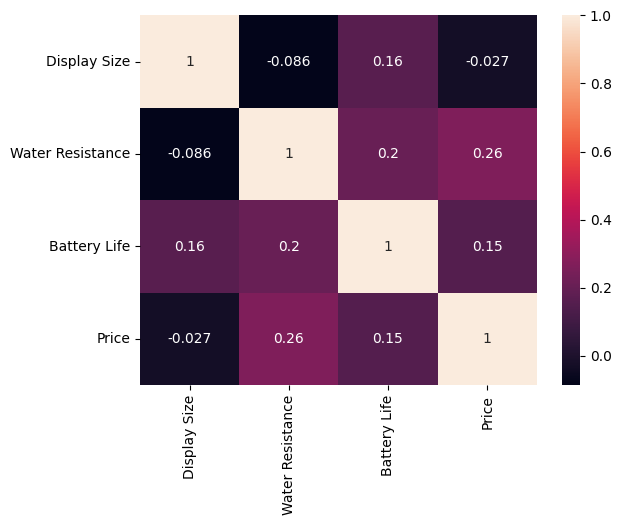

In [31]:
sns.heatmap(correlation_value,annot=True)

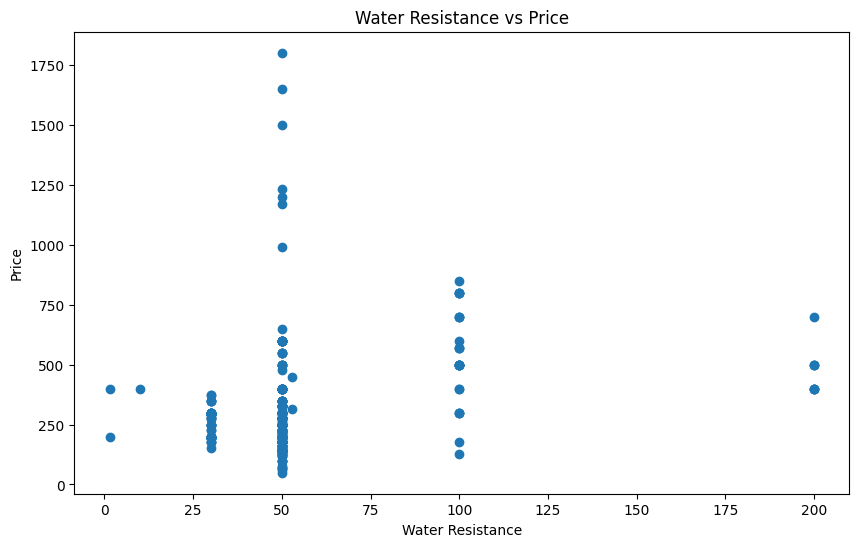

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(df['Water Resistance'], df['Price'])
plt.title('Water Resistance vs Price')
plt.xlabel('Water Resistance')
plt.ylabel('Price')
plt.show()

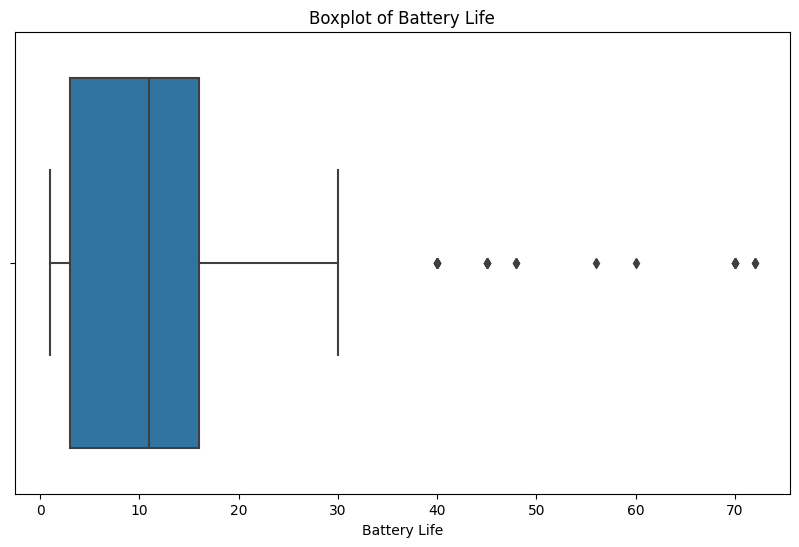

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Battery Life')
plt.title('Boxplot of Battery Life')
plt.show()

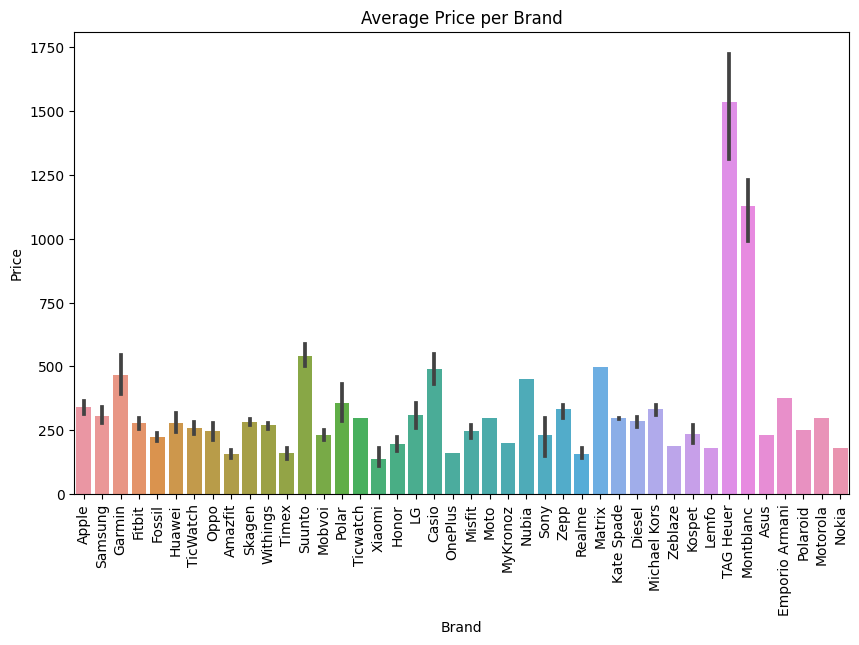

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Brand', y='Price', estimator=np.mean)
plt.title('Average Price per Brand')
plt.xticks(rotation=90)
plt.show()

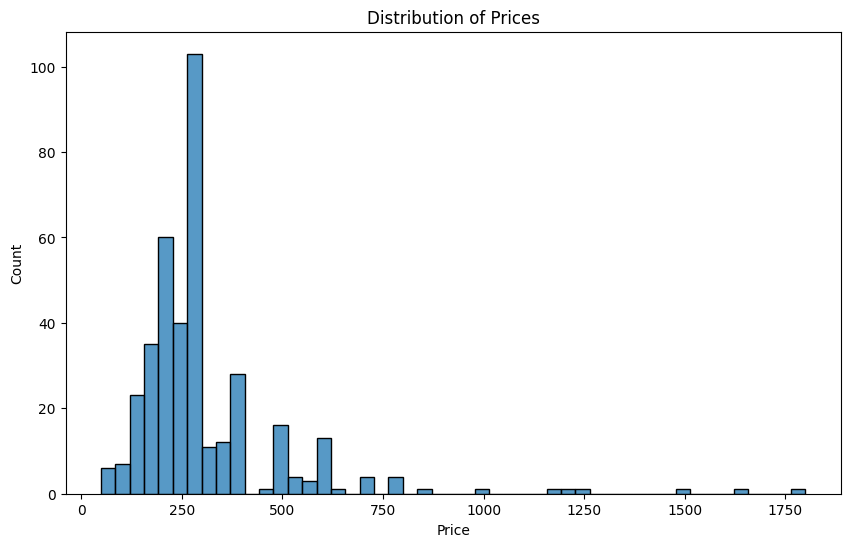

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Price')
plt.title('Distribution of Prices')
plt.show()

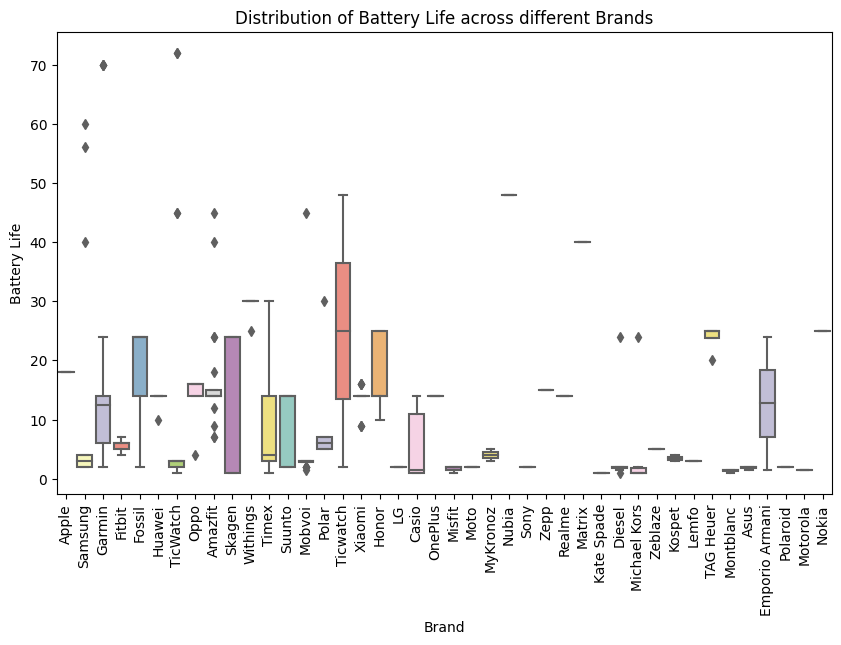

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Brand', y='Battery Life', palette='Set3')
plt.title('Distribution of Battery Life across different Brands')
plt.xticks(rotation=90)
plt.show()

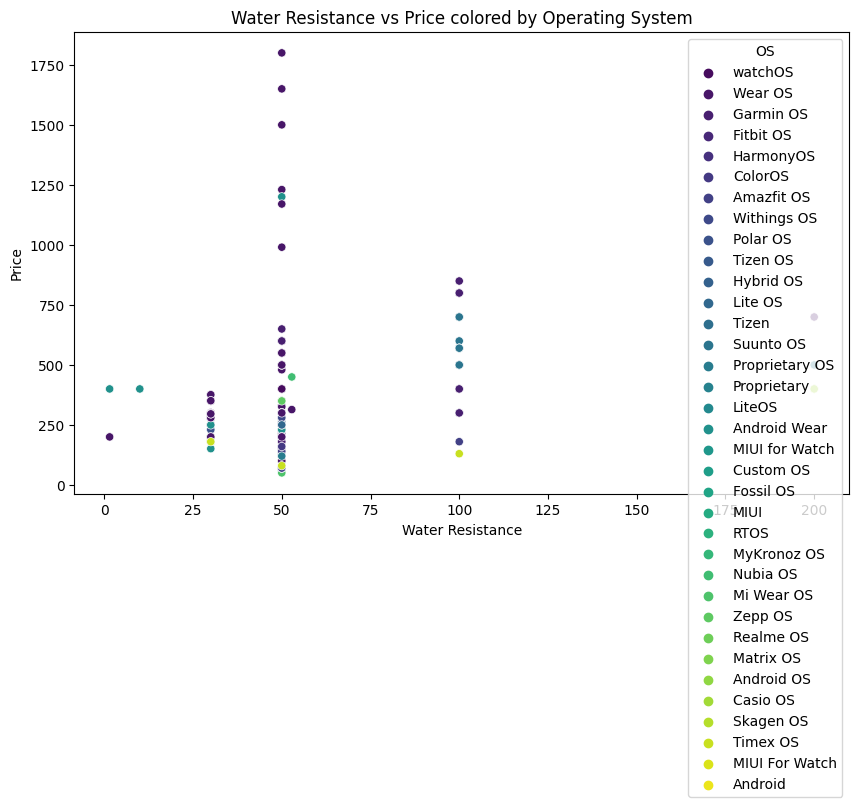

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Water Resistance', y='Price', hue='OS', palette='viridis')
plt.title('Water Resistance vs Price colored by Operating System')
plt.show()

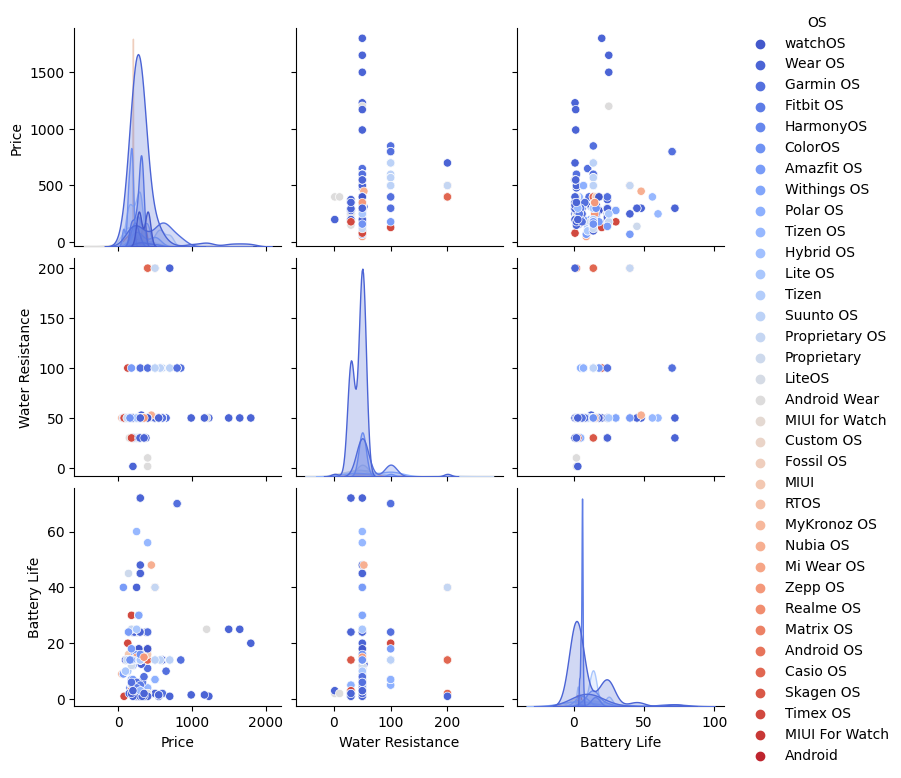

In [38]:
sns.pairplot(df[['Price', 'Water Resistance', 'Battery Life', 'OS']], hue='OS', palette='coolwarm')
plt.show()

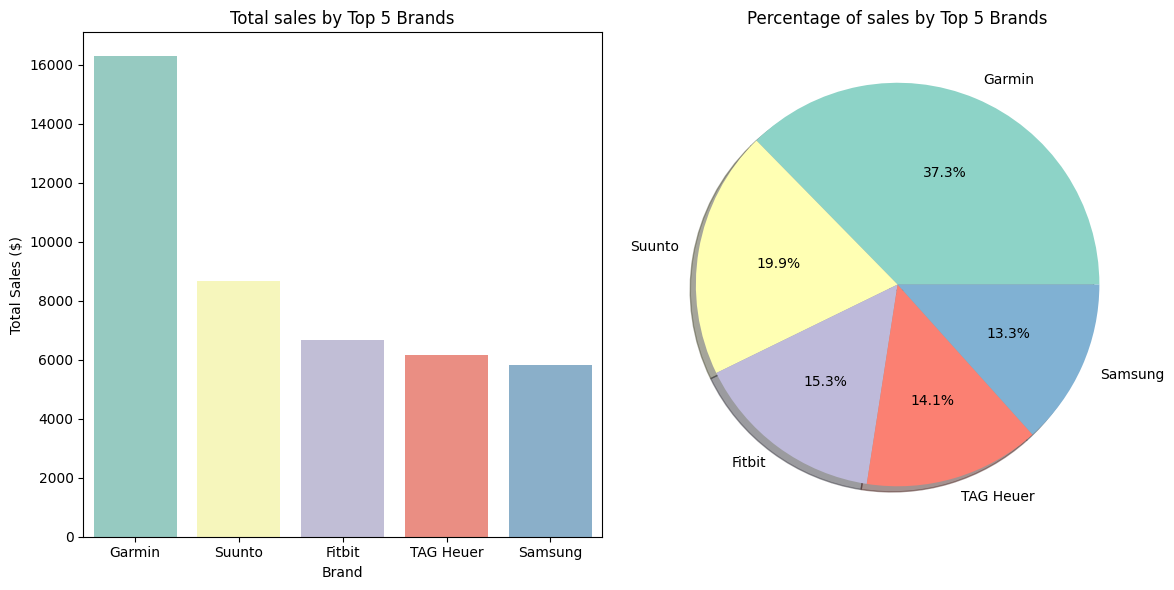

In [39]:

total_sales = df.groupby("Brand")["Price"].sum().reset_index()

top_brands = total_sales.sort_values("Price", ascending=False).head(5)

top_brands['Percent'] = top_brands['Price'] / top_brands['Price'].sum() * 100

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.barplot(x="Brand", y="Price", data=top_brands, palette='Set3', ax=axes[0])

axes[0].set_xlabel("Brand")
axes[0].set_ylabel('Total Sales ($)')
axes[0].set_title("Total sales by Top 5 Brands")

colors = sns.color_palette('Set3', top_brands.shape[0]).as_hex()

axes[1].pie(top_brands['Percent'], labels=top_brands['Brand'], colors=colors, autopct='%1.1f%%', shadow=True)
axes[1].set_title("Percentage of sales by Top 5 Brands")

fig.tight_layout()

plt.show()

###Handling Categorical Values

In [40]:
le = LabelEncoder()

In [41]:
for col in df.columns[df.dtypes == 'object']:
    le.fit(df[col])
    print(f"Column: {col}")
    for class_, label in zip(le.classes_, range(len(le.classes_))):
        print(f"'{class_}': {label}")
    df[col] = le.transform(df[col])
    print()
    print()

Column: Brand
'Amazfit': 0
'Apple': 1
'Asus': 2
'Casio': 3
'Diesel': 4
'Emporio Armani': 5
'Fitbit': 6
'Fossil': 7
'Garmin': 8
'Honor': 9
'Huawei': 10
'Kate Spade': 11
'Kospet': 12
'LG': 13
'Lemfo': 14
'Matrix': 15
'Michael Kors': 16
'Misfit': 17
'Mobvoi': 18
'Montblanc': 19
'Moto': 20
'Motorola': 21
'MyKronoz': 22
'Nokia': 23
'Nubia': 24
'OnePlus': 25
'Oppo': 26
'Polar': 27
'Polaroid': 28
'Realme': 29
'Samsung': 30
'Skagen': 31
'Sony': 32
'Suunto': 33
'TAG Heuer': 34
'TicWatch': 35
'Ticwatch': 36
'Timex': 37
'Withings': 38
'Xiaomi': 39
'Zeblaze': 40
'Zepp': 41


Column: Model
'7': 0
'9 Baro': 1
'9 Peak': 2
'Access Bradshaw 2': 3
'Access Gen 5': 4
'Access Runway': 5
'Alpha': 6
'Bip S': 7
'Bip U Pro': 8
'C2': 9
'C2+': 10
'Charge 5': 11
'Collider': 12
'Collider HR': 13
'Connected': 14
'Connected Modular 45': 15
'Cosmo': 16
'E2': 17
'E3': 18
'Enduro': 19
'Fadelite': 20
'Falster 2': 21
'Falster 3': 22
'Fenix 6 Pro Solar': 23
'Forerunner 945': 24
'Forerunner 945 LTE': 25
'G-Shock GBD-H1000'

In [42]:
df.head()

,Brand,Model,OS,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,Heart Rate Monitor,GPS,NFC,Price
0,1,127,34,2,17,1.90,27,50.0,18.0,0,1,1,399.0
1,30,36,31,2,0,1.40,31,50.0,40.0,0,1,1,249.0
2,8,105,9,1,0,1.30,30,50.0,11.0,0,1,0,399.0
3,6,109,7,1,0,1.58,19,50.0,6.0,0,1,1,229.0
4,7,43,31,1,0,1.28,30,30.0,24.0,0,1,1,299.0


In [43]:
df.tail()

,Brand,Model,OS,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,Heart Rate Monitor,GPS,NFC,Price
374,38,79,32,1,16,1.38,21,50.0,30.0,0,0,1,279.0
375,41,132,33,2,0,1.39,32,50.0,15.0,0,1,1,349.0
376,9,119,12,1,0,1.39,32,50.0,25.0,0,1,1,249.0
377,26,118,5,1,0,1.64,17,50.0,14.0,0,0,1,159.0
378,35,71,31,2,0,1.40,32,50.0,72.0,0,1,1,299.0


###Splitting Dependent and independent Variables

In [44]:
x = df.drop(["Price"],axis = 1)

In [45]:
x

,Brand,Model,OS,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,Heart Rate Monitor,GPS,NFC
0,1,127,34,2,17,1.90,27,50.0,18.0,0,1,1
1,30,36,31,2,0,1.40,31,50.0,40.0,0,1,1
2,8,105,9,1,0,1.30,30,50.0,11.0,0,1,0
3,6,109,7,1,0,1.58,19,50.0,6.0,0,1,1
4,7,43,31,1,0,1.28,30,30.0,24.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
374,38,79,32,1,16,1.38,21,50.0,30.0,0,0,1
375,41,132,33,2,0,1.39,32,50.0,15.0,0,1,1
376,9,119,12,1,0,1.39,32,50.0,25.0,0,1,1
377,26,118,5,1,0,1.64,17,50.0,14.0,0,0,1


In [46]:
y = df["Price"]
y

0      399.0
1      249.0
2      399.0
3      229.0
4      299.0
       ...  
374    279.0
375    349.0
376    249.0
377    159.0
378    299.0
Name: Price, Length: 379, dtype: float64

In [47]:
type(x)

pandas.core.frame.DataFrame

In [48]:
type(y)

pandas.core.series.Series

###Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [50]:
x_Scaled=ms.fit_transform(x)

In [51]:
x_Scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [52]:
x_Scaled.head()

,Brand,Model,OS,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,Heart Rate Monitor,GPS,NFC
0,0.024390,0.933824,1.000000,0.50,0.653846,0.321543,0.771429,0.244332,0.239437,0.0,1.0,1.0
1,0.731707,0.264706,0.911765,0.50,0.000000,0.160772,0.885714,0.244332,0.549296,0.0,1.0,1.0
2,0.195122,0.772059,0.264706,0.25,0.000000,0.128617,0.857143,0.244332,0.140845,0.0,1.0,0.0
3,0.146341,0.801471,0.205882,0.25,0.000000,0.218650,0.542857,0.244332,0.070423,0.0,1.0,1.0
4,0.170732,0.316176,0.911765,0.25,0.000000,0.122186,0.857143,0.143577,0.323944,0.0,1.0,1.0


###Splitting Train And Test

In [53]:
from sklearn.model_selection import train_test_split as tts

In [54]:
x_Scaled.shape, y.shape

((379, 12), (379,))

In [55]:
x_train,x_test,y_train,y_test = tts(x_Scaled,y,test_size=0.2,random_state=0)

In [56]:
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((303, 12), (76, 12), (303,), (76,))

###Model Building

Linear Regression

In [57]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Decision Tree Regressor Model

In [58]:
dtr = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10)

##Random Forest Model

In [59]:
rf_regressor=RandomForestRegressor(n_estimators=50,
                                   max_depth=8,
                                   min_weight_fraction_leaf=0.5,
                                   max_features=0.8,
                                   random_state=42)
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, max_features=0.8,
                      min_weight_fraction_leaf=0.5, n_estimators=50,
                      random_state=42)

In [60]:
gb_regressor=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=1,random_state=42)
gb_regressor.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [61]:
xgb=XGBRegressor(n_estimators=1000,learning_rate=0.06,max_depth=2,subsample=0.7,colsample_bytree=0.4,colsample_bylevel=0.5,max_leaves=3,random_state=1)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.5, colsample_bynode=None, colsample_bytree=0.4,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.06, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=3, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [62]:
predict_train= lr.predict(x_train)
error_score_lr_train=r2_score(y_train,predict_train)
print("R2 score: ",error_score_lr_train)
mse=mean_squared_error(y_train,predict_train)
print("mean_square_error_value: ",mse)
rmse_lr_train=np.sqrt(mse)
print("rmse_lr_train_value: ",rmse_lr_train)

R2 score:  0.21875159109680375
mean_square_error_value:  29805.04812033143
rmse_lr_train_value:  172.6413858851099


In [63]:
predict_test=lr.predict(x_test)
error_score_lr_test=r2_score(y_test,predict_test)
print("R2 score: ",error_score_lr_test)
mse=mean_squared_error(y_test,predict_test)
print("mean_square_error_value: ",mse)
rmse_lr_test=np.sqrt(mse)
print("rmse_lr_train_value: ",rmse_lr_test)

R2 score:  0.21467419255203912
mean_square_error_value:  40184.48253814833
rmse_lr_train_value:  200.4606757899123


In [64]:
predict_train_dtr=dtr.predict(x_train)
error_score_dtr_train=r2_score(y_train,predict_train_dtr)
print("R2 score: ",error_score_dtr_train)
mse=mean_squared_error(y_train,predict_train_dtr)
print("mean_square_error_value: ",mse)
rmse_dtr_train=np.sqrt(mse)
print("rmse_lr_train_value: ",rmse_dtr_train)

R2 score:  0.7416991066876387
mean_square_error_value:  9854.31837935872
rmse_lr_train_value:  99.26891950333055


In [65]:
predict_test_dtr=dtr.predict(x_test)

error_score_dtr_test=r2_score(y_test,predict_test_dtr)
print("R2 score: ",error_score_dtr_test)
mse=mean_squared_error(y_test,predict_test_dtr)
print("mean_square_error_value: ",mse)
rmse_dtr_test=np.sqrt(mse)
print("rmse_lr_train_value: ",rmse_dtr_test)

R2 score:  -0.2582697730185306
mean_square_error_value:  64384.64041625619
rmse_lr_train_value:  253.74128638488492


In [66]:
predict_train_rf_regressor=rf_regressor.predict(x_train)

error_score_rf_regressor_train=r2_score(y_train,predict_train_rf_regressor)
print("R2 score: ",error_score_rf_regressor_train)
mse=mean_squared_error(y_train,predict_train_rf_regressor)
print("mean_square_error_value: ",mse)
rmse_rf_regressor_train=np.sqrt(mse)
print("rmse_rf_regressor_train_value: ",rmse_rf_regressor_train)

R2 score:  -0.0006247551746507707
mean_square_error_value:  38174.374038399794
rmse_rf_regressor_train_value:  195.38263494589225


In [67]:
predict_test_rf_regressor=rf_regressor.predict(x_test)

error_score_rf_regressor_test=r2_score(y_test,predict_test_rf_regressor)
print("R2 score: ",error_score_rf_regressor_test)
mse=mean_squared_error(y_test,predict_test_rf_regressor)
print("mean_square_error_value: ",mse)
rmse_rf_regressor_test=np.sqrt(mse)
print("rmse_rf_regressor_test_value: ",rmse_rf_regressor_test)

R2 score:  -0.000945652833005628
mean_square_error_value:  51217.57457406456
rmse_rf_regressor_test_value:  226.313001336787


In [68]:
predict_train_gb_regressor=gb_regressor.predict(x_train)

error_score_gb_regressor_train=r2_score(y_train,predict_train_gb_regressor)
print("R2 score: ",error_score_gb_regressor_train)
mse=mean_squared_error(y_train,predict_train_gb_regressor)
print("mean_square_error_value: ",mse)
rmse_gb_regressor_train=np.sqrt(mse)
print("rmse_gb_regressor_train_value: ",rmse_gb_regressor_train)

R2 score:  0.44338937208867235
mean_square_error_value:  21234.995630231922
rmse_gb_regressor_train_value:  145.72232371957264


In [69]:
predict_test_gb_regressor=gb_regressor.predict(x_test)

error_score_gb_regressor_test=r2_score(y_test,predict_test_gb_regressor)
print("R2 score: ",error_score_gb_regressor_test)
mse=mean_squared_error(y_test,predict_test_gb_regressor)
print("mean_square_error_value: ",mse)
rmse_gb_regressor_test=np.sqrt(mse)
print("rmse_gb_regressor_test_value: ",rmse_gb_regressor_test)

R2 score:  0.2826974445772543
mean_square_error_value:  36703.788083348496
rmse_gb_regressor_test_value:  191.58232716863134


In [70]:
predict_train_xgb=xgb.predict(x_train)

error_score_xgb_train=r2_score(y_train,predict_train_xgb)
print("R2 score: ",error_score_xgb_train)
mse=mean_squared_error(y_train,predict_train_xgb)
print("mean_square_error_value: ",mse)
rmse_xgb_train=np.sqrt(mse)
print("rmse_xgb_train_value: ",rmse_xgb_train)

R2 score:  0.9225684036730926
mean_square_error_value:  2954.0571580780256
rmse_xgb_train_value:  54.35123879064787


In [71]:
predict_test_xgb=xgb.predict(x_test)

error_score_xgb_test=r2_score(y_test,predict_test_xgb)
print("R2 score: ",error_score_xgb_test)
mse=mean_squared_error(y_test,predict_test_xgb)
print("mean_square_error_value: ",mse)
rmse_xgb_test=np.sqrt(mse)
print("rmse_xgb_test_value: ",rmse_xgb_test)

R2 score:  0.6449853279942095
mean_square_error_value:  18165.81188686898
rmse_xgb_test_value:  134.78060649392026


In [72]:
results=pd.DataFrame(columns=['model','Training_R2','Testing_R2','Training_rmse','Testing_rmse'])
results.loc[0]=['Linear Regression',error_score_lr_train,error_score_lr_test,rmse_lr_train,rmse_lr_test]
results.loc[1]=['Decision Tree Regressor',error_score_dtr_train,error_score_dtr_test,rmse_dtr_train,rmse_dtr_test]
results.loc[2]=['Random Forest Regressor',error_score_rf_regressor_train,error_score_rf_regressor_test,rmse_rf_regressor_train,rmse_rf_regressor_test]
results.loc[3]=['Gradient Boosting Regressor',error_score_gb_regressor_train,error_score_gb_regressor_test,rmse_gb_regressor_train,rmse_gb_regressor_test]
results.loc[4]=['XG Boost Regressor',error_score_xgb_train,error_score_xgb_test,rmse_xgb_train,rmse_xgb_test]

In [73]:
model=['Linear Regression','Decision Tree Regressor','Random Forest Regressor','Gradient Boosting Regressor','XG Boost Regressor']

In [74]:
print(results)

                         model  Training_R2  Testing_R2  Training_rmse  \
0            Linear Regression     0.218752    0.214674     172.641386   
1      Decision Tree Regressor     0.741699   -0.258270      99.268920   
2      Random Forest Regressor    -0.000625   -0.000946     195.382635   
3  Gradient Boosting Regressor     0.443389    0.282697     145.722324   
4           XG Boost Regressor     0.922568    0.644985      54.351239   

   Testing_rmse  
0    200.460676  
1    253.741286  
2    226.313001  
3    191.582327  
4    134.780606  


In [75]:
import pickle
pickle.dump(xgb,open('model.pkl','wb'))
pickle.dump(ms,open('scaler.pkl', 'wb'))